In [1]:
import sys
sys.path.append("/home/sardarchitect/repos/fscoreai-ml/")

In [2]:
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sample_data import sample_data
from fscoreai.linear import LogisticRegression
from fscoreai.utils import sigmoid

## Data

In [3]:
X, y = sample_data.diabetes_classification()

In [4]:
def display_xy_plots(X, y):
    n_features = X.shape[1]
    n_cols = 2 if n_features > 1 else 1
    n_rows = n_features // 2
    print(f"Displaying {n_rows} rows and {n_cols} columns")
    
    fig, axs = plt.subplots(n_rows, n_cols)
    selected_feature = 0
    if n_rows == 1:
        for i in range(n_cols):
                axs[i].scatter(X[:, selected_feature], y)
                selected_feature += 1

    else: 
        for i in range(n_rows):
            for j in range(n_cols):
                axs[i][j].scatter(X[:, selected_feature], y)
                selected_feature += 1
    plt.show()

Displaying 2 rows and 2 columns


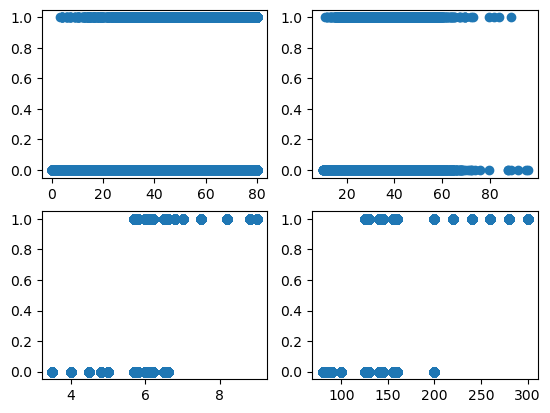

In [5]:
display_xy_plots(X, y)

In [6]:
len(y[y == 0]), len(y[y == 1])

(91500, 8500)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 4), (80000,), (20000, 4), (20000,))

## Model

_______________________________________________
[-27.65442632] [[0.05154581 0.09369339 2.35712234 0.03361887]]
0.95825
_______________________________________________
(80000, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 992.00it/s]


_______________________________________________
[1.51264969] [ 0.06528719 -0.40813084  0.68211069 -0.07140908]
0.91165
_______________________________________________


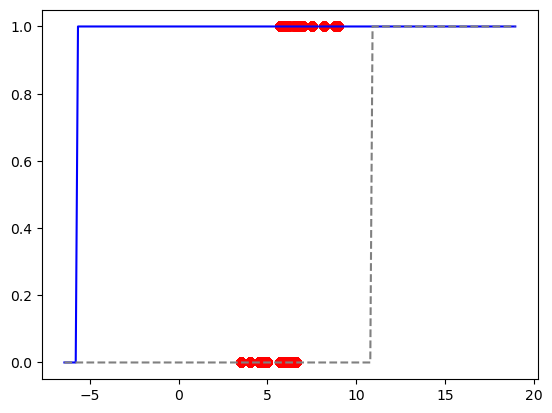

In [8]:
sklearn_model = SklearnLogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, y_train.squeeze())
sklearn_model_pred = sklearn_model.predict(X_test)
print("_______________________________________________")
print(sklearn_model.intercept_, sklearn_model.coef_)
print(sklearn_model.score(X_test, y_test))
print("_______________________________________________")

fscoreai_model = LogisticRegression()
fscoreai_model.fit(X_train, y_train, lr=1e-12, epochs=1000)
fscoreai_model_pred = fscoreai_model.predict(X_test)
print("_______________________________________________")
print(fscoreai_model.intercept_, fscoreai_model.coef_)
print(fscoreai_model.score(X_test, y_test))
print("_______________________________________________")

selected_feature = 2
x_plot = np.linspace(np.min(X_test[:, selected_feature]-10), np.max(X_test[:, selected_feature]+10), num=800).reshape(-1, 4)
y_plot = fscoreai_model.predict(x_plot)
y_plot_2 = sklearn_model.predict(x_plot)

plt.plot(x_plot[:, selected_feature], y_plot, color='blue')
plt.plot(x_plot[:, selected_feature], y_plot_2, color='grey', linestyle='--')
plt.scatter(X_test[:, selected_feature], y_test, color='red')
plt.show()

In [42]:
X = np.array([[27,20,5,100]])
sklearn_model.predict(X)

array([0])